# WeatherPy
---

## Setup

In [48]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os  #for output
from scipy.stats import linregress
from concurrent.futures import ThreadPoolExecutor, as_completed
from adjustText import adjust_text

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate List of Cities from `citipy`

In [4]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty list for holding the cities names
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## **Requirement 1:** Create Plots to Showcase the Relationship Between Weather Variables and Latitude
---

### Use OpenWeatherMap API to retrieve weather data from cities list

#### Longer way

In [5]:
# setup base url
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# empty list for city data collection
city_data = []

# indicate start of city data collection
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# run api request on each city in list
for city in cities:
    
    try:
        # setup query url for each city
        city_url = f"{base_url}&q={city}&units=metric"

        # get city's weather data
        weather_json = requests.get(city_url).json()

        # collect each city's data
        city_data.append({
            "City": city,
            "Country": weather_json['sys']['country'],
            "Date": weather_json['dt'],
            "Lat": weather_json['coord']['lat'],
            "Lng": weather_json['coord']['lon'],
            "Max Temp": weather_json['main']['temp_max'],
            "Humidity": weather_json['main']['humidity'],
            "Cloudiness": weather_json['clouds']['all'],
            "Wind Speed": weather_json['wind']['speed']
        })
    except:
        print(f"City, {city.title()}, not found. Skipping...")
    
    # pause to avoid rate limiting
    time.sleep(1)

# indicate end of city data collection
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

------------------------
Beginning Data Retrieval
------------------------
City, Cable Beach, not found. Skipping...
City, Fuvahmulah, not found. Skipping...
City, Puerto San Carlos, not found. Skipping...
City, Bargara, not found. Skipping...
City, Taiohae, not found. Skipping...
City, Yuzhnoukrayinsk, not found. Skipping...
City, Am Djarass, not found. Skipping...
City, Ytyk-Kyuyel', not found. Skipping...
City, Fonadhoo, not found. Skipping...
City, Villa Alberto Andres Alvarado Aramburo, not found. Skipping...
City, 'Ohonua, not found. Skipping...
City, Cargados Carajos, not found. Skipping...
City, Ahau, not found. Skipping...
City, Saksaul'Skiy, not found. Skipping...
City, Tranovaho, not found. Skipping...
City, Tsiolkovskiy, not found. Skipping...
City, Kataragama, not found. Skipping...
City, Espargos, not found. Skipping...
City, Cairns City, not found. Skipping...
City, Toga Village, not found. Skipping...
City, Vingt Cinq, not found. Skipping...
City, Takamaka, not found. S

#### Faster way

In [6]:
# setup base url
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# empty list for city data collection
city_data = []

# define function to get city data
def get_city_data(city):
    try:
        # setup query url for city
        city_url = f"{base_url}&q={city}&units=metric"

        # add 1 second delay to avoid rate limiting
        time.sleep(1)

        # get city's weather data
        weather_json = requests.get(city_url).json()

        # return city's data
        return {
            "City": city,
            "Country": weather_json['sys']['country'],
            "Date": weather_json['dt'],
            "Lat": weather_json['coord']['lat'],
            "Lng": weather_json['coord']['lon'],
            "Max Temp": weather_json['main']['temp_max'],
            "Humidity": weather_json['main']['humidity'],
            "Cloudiness": weather_json['clouds']['all'],
            "Wind Speed": weather_json['wind']['speed']
        }
    except:
        # if city not found then show this and return nothing
        print(f"City, {city.title()}, not found. Skipping...")
        return None

# indicate start of city data collection
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# use ThreadpoolExecuter to parralize requests
with ThreadPoolExecutor(max_workers=5) as executor:
    
    # submit api request task for each city
    futures = [executor.submit(get_city_data, city) for city in cities]
 
    # run api request on each city in list
    for future in as_completed(futures):
        
        # retrieve data from the future object
        result = future.result()

        # if city's data exists then add to city_data
        if result:
            city_data.append(result)

# indicate end of city data collection
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

------------------------
Beginning Data Retrieval
------------------------
City, Cable Beach, not found. Skipping...
City, Fuvahmulah, not found. Skipping...
City, Puerto San Carlos, not found. Skipping...
City, Bargara, not found. Skipping...
City, Taiohae, not found. Skipping...
City, Yuzhnoukrayinsk, not found. Skipping...
City, Am Djarass, not found. Skipping...
City, Ytyk-Kyuyel', not found. Skipping...
City, Fonadhoo, not found. Skipping...
City, Villa Alberto Andres Alvarado Aramburo, not found. Skipping...
City, 'Ohonua, not found. Skipping...
City, Cargados Carajos, not found. Skipping...
City, Ahau, not found. Skipping...
City, Saksaul'Skiy, not found. Skipping...
City, Tranovaho, not found. Skipping...
City, Tsiolkovskiy, not found. Skipping...
City, Kataragama, not found. Skipping...
City, Espargos, not found. Skipping...
City, Cairns City, not found. Skipping...
City, Toga Village, not found. Skipping...
City, Vingt Cinq, not found. Skipping...
City, Takamaka, not found. S

### Setup/export city data

In [7]:
# Convert city data into a dataframe
city_data_df = pd.DataFrame(city_data)

# display df
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,puerto natales,CL,1731445654,-51.7236,-72.4875,17.25,51,75,11.83
1,jamestown,US,1731445580,42.0970,-79.2353,7.23,57,0,4.12
2,la'ie,US,1731445654,21.6477,-157.9253,27.81,75,91,4.02
3,beloyarskiy,RU,1731445654,63.7119,66.6722,-21.45,100,39,1.53
4,waitangi,NZ,1731445654,-43.9535,-176.5597,13.23,71,9,2.68


In [8]:
# show record count
city_data_df.count()

City          577
Country       577
Date          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
dtype: int64

In [9]:
# output city dataframe

# define output folder path
output_path = ("../output_data")

# check if output folder exists and create it if it doesn't
os.makedirs(output_path, exist_ok=True)

# export city dataframe into a csv
city_data_df.to_csv(f"{output_path}/cities_data.csv", index_label="City_ID")

In [10]:
# read saved data
city_data_df = pd.read_csv(f"{output_path}/cities_data.csv", index_col="City_ID")

# display city data
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,puerto natales,CL,1731445654,-51.7236,-72.4875,17.25,51,75,11.83
1,jamestown,US,1731445580,42.0970,-79.2353,7.23,57,0,4.12
2,la'ie,US,1731445654,21.6477,-157.9253,27.81,75,91,4.02
3,beloyarskiy,RU,1731445654,63.7119,66.6722,-21.45,100,39,1.53
4,waitangi,NZ,1731445654,-43.9535,-176.5597,13.23,71,9,2.68


### Create Scatter Plots Requested

#### Latitude vs. Tempurature

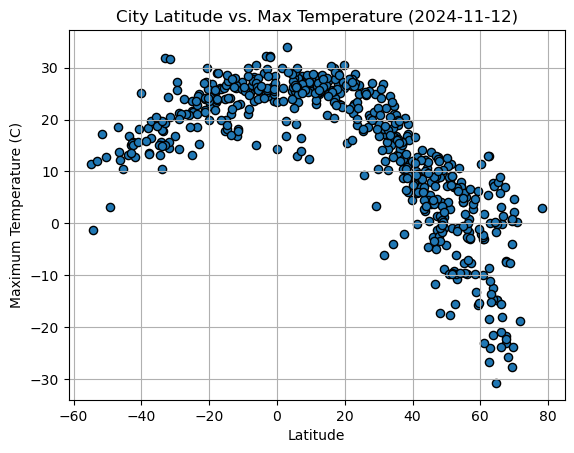

In [24]:
# get current date from first date value to display
current_date = pd.to_datetime(city_data_df.iloc[0, 2], unit='s').strftime('%Y-%m-%d')

# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', 
                  title=f'City Latitude vs. Max Temperature ({current_date})',
                  xlabel='Latitude', ylabel='Maximum Temperature (C)', 
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig1.png")

# show plot
plt.show()

### Latitude vs. Humidity

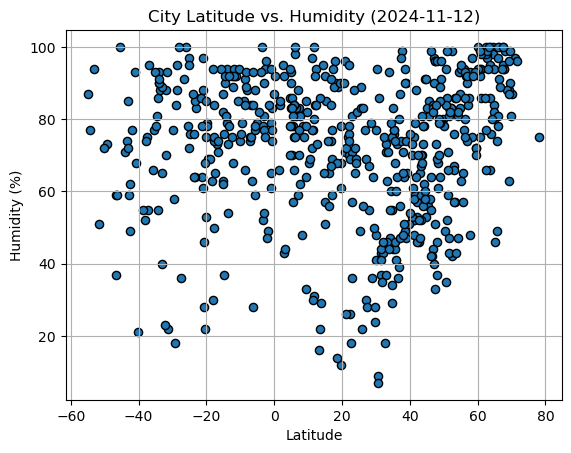

In [25]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',
                  title=f'City Latitude vs. Humidity ({current_date})',
                  xlabel='Latitude', ylabel='Humidity (%)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig2.png")

# show plot
plt.show()

### Latitude vs. Cloudiness

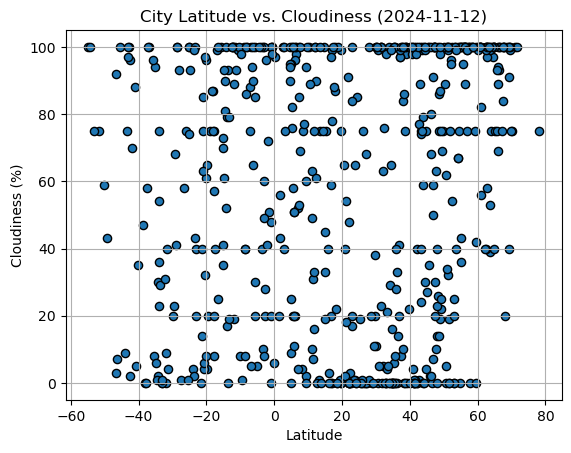

In [26]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness',
                  title=f'City Latitude vs. Cloudiness ({current_date})',
                  xlabel='Latitude', ylabel='Cloudiness (%)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig3.png")

# show plot
plt.show()

### Latitude vs. Wind Speed

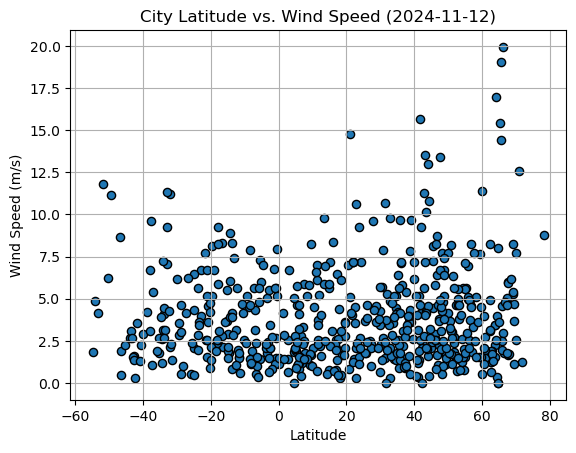

In [27]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed',
                  title=f'City Latitude vs. Wind Speed ({current_date})',
                  xlabel='Latitude', ylabel='Wind Speed (m/s)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig4.png")

# show plot
plt.show()

## **Requirement 2:** Compute Linear Regression for Each Relationship
---

In [186]:
# define function to create linear regression plots
def plot_linregress(x_values, y_values, title, xlabel, ylabel):

    # linear regression calculation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # print r^2 value
    print(f"r^2 value: {rvalue ** 2}")

    # create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # add linear equation to plot
    text = plt.text(0.95, 0.05, line_eq, fontsize=15, color='red')
    adjust_text([text], x=x_values, y=y_values, avoid_self=True) # adjust text placement

    # customize plot labeling
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [187]:
# northern hemisphere dataframe: latitude >= 0
north_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# display df
north_hemisphere_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
1,jamestown,US,1731445580,42.0970,-79.2353,7.23,57,0,4.12
2,la'ie,US,1731445654,21.6477,-157.9253,27.81,75,91,4.02
3,beloyarskiy,RU,1731445654,63.7119,66.6722,-21.45,100,39,1.53
5,nazarovo,RU,1731445655,56.0064,90.3914,-9.75,77,100,6.96
7,al kharijah,EG,1731445655,25.4514,30.5464,17.83,49,19,3.66


In [188]:
# southern hemisphere dataframe: latitude < 0
south_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# display df
south_hemisphere_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,puerto natales,CL,1731445654,-51.7236,-72.4875,17.25,51,75,11.83
4,waitangi,NZ,1731445654,-43.9535,-176.5597,13.23,71,9,2.68
6,touros,BR,1731445655,-5.1989,-35.4608,25.72,79,5,5.99
8,adamstown,PN,1731445655,-25.0660,-130.1015,21.65,72,100,4.31
10,west island,CC,1731445657,-12.1568,96.8225,25.99,89,100,5.66


###  Temperature vs. Latitude Linear Regression Plot

r^2 value: 0.7130276126484797


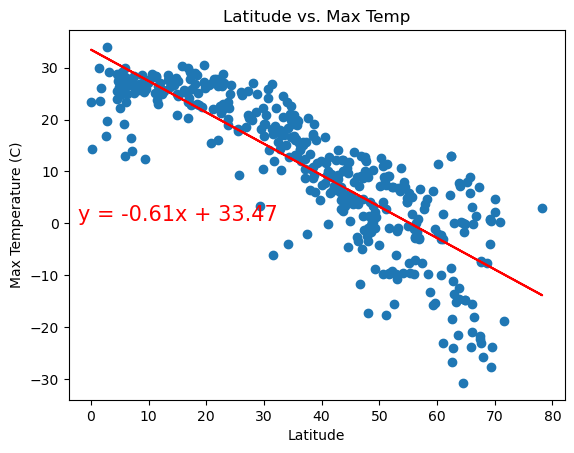

In [189]:
# for northern hemisphere
plot_linregress(north_hemisphere_df['Lat'], north_hemisphere_df['Max Temp'], 
                title='Latitude vs. Max Temp', xlabel='Latitude', ylabel='Max Temperature (C)')

r^2 value: 0.5418146829616993


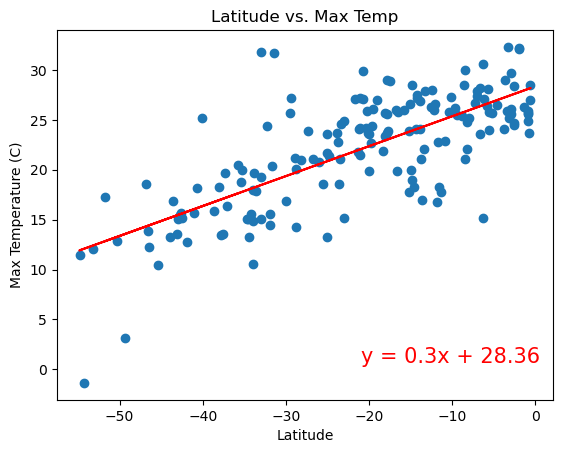

In [190]:
# for southern hemisphere
plot_linregress(south_hemisphere_df['Lat'], south_hemisphere_df['Max Temp'],
                title='Latitude vs. Max Temp', xlabel='Latitude', ylabel='Max Temperature (C)')

**Discussion about the linear relationship:** RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r^2 value: 0.044965445378693805


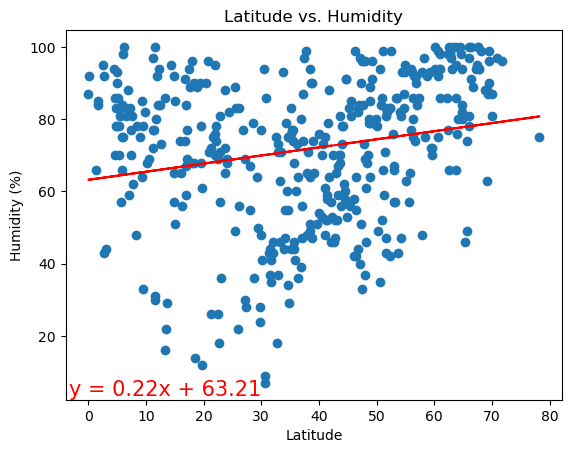

In [191]:
# for northern hemisphere
plot_linregress(north_hemisphere_df['Lat'], north_hemisphere_df['Humidity'],
                title='Latitude vs. Humidity', xlabel='Latitude', ylabel='Humidity (%)')


r^2 value: 0.020025745775779803


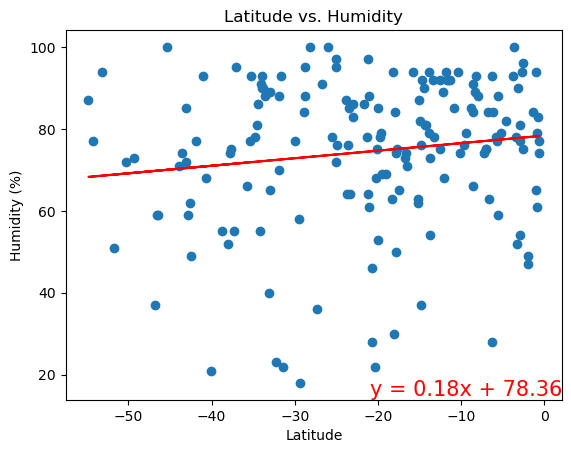

In [192]:
# for southern hemisphere
plot_linregress(south_hemisphere_df['Lat'], south_hemisphere_df['Humidity'],
                title='Latitude vs. Humidity', xlabel='Latitude', ylabel='Humidity (%)')

**Discussion about the linear relationship:** RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r^2 value: 0.06939835201959206


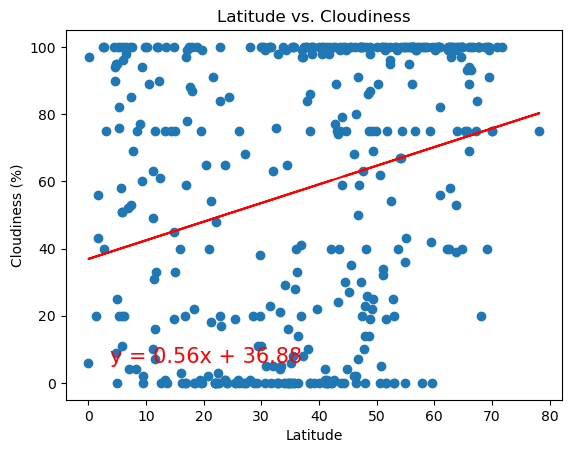

In [193]:
# northern hemisphere
plot_linregress(north_hemisphere_df['Lat'], north_hemisphere_df['Cloudiness'],
                title='Latitude vs. Cloudiness', xlabel='Latitude', ylabel='Cloudiness (%)')

r^2 value: 0.01555374368221591


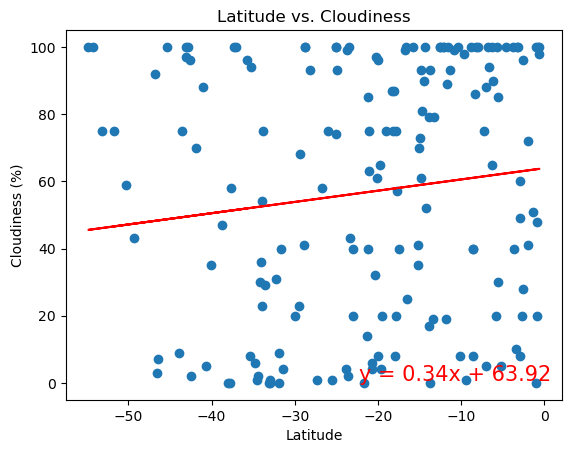

In [194]:
# southern hemisphere
plot_linregress(south_hemisphere_df['Lat'], south_hemisphere_df['Cloudiness'],
                title='Latitude vs. Cloudiness', xlabel='Latitude', ylabel='Cloudiness (%)')

**Discussion about the linear relationship:** RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r^2 value: 0.026693770251570124


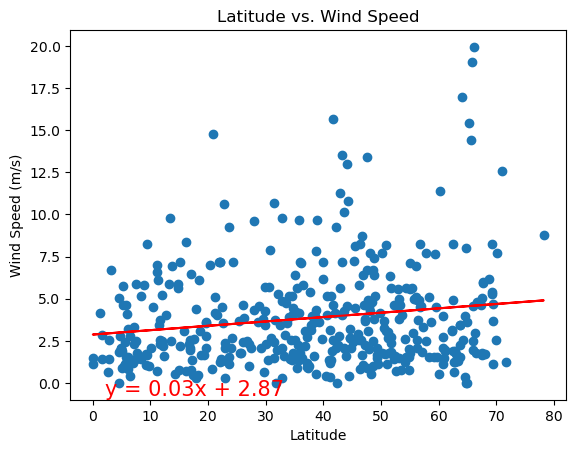

In [195]:
# northern hemisphere
plot_linregress(north_hemisphere_df['Lat'], north_hemisphere_df['Wind Speed'],
                title='Latitude vs. Wind Speed', xlabel='Latitude', ylabel='Wind Speed (m/s)')

r^2 value: 0.026693770251570124


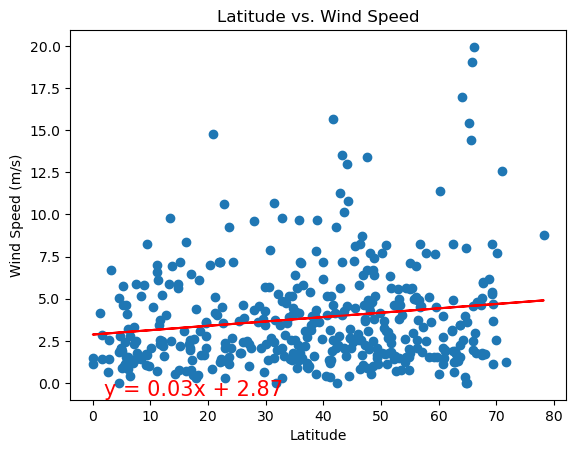

In [196]:
# southern hemisphere
plot_linregress(north_hemisphere_df['Lat'], north_hemisphere_df['Wind Speed'],
                title='Latitude vs. Wind Speed', xlabel='Latitude', ylabel='Wind Speed (m/s)')

**Discussion about the linear relationship:** RESPONSE HERE